In [177]:
# installing pytrends python package which acts as an unofficial Google Trends API
!pip install pytrends;

In [178]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe


In [179]:
# connect to Google
from pytrends.request import TrendReq
pytrend = TrendReq(hl='en-US', tz=360)

In [180]:
keywords = ['TikTok', 'Snapchat', 'Twitter', 'Instagram']
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='today 12-m',
     geo='US',
     gprop='')
df = pytrend.interest_over_time()
df = df.drop(labels=['isPartial'], axis='columns')

### According to the CDC, the first case of COVID-19 in the United States occured on January 14th, 2020.
#### Source: https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/cases-in-us.html

### Our data will have a range from January 14th, 2020 to April 1st, 2020.

In [181]:
df.head()

,TikTok,Snapchat,Twitter,Instagram
date,,,,
2019-04-07,1,12,50,77
2019-04-14,1,13,53,79
2019-04-21,1,13,53,79
2019-04-28,1,12,50,77
2019-05-05,1,16,52,76


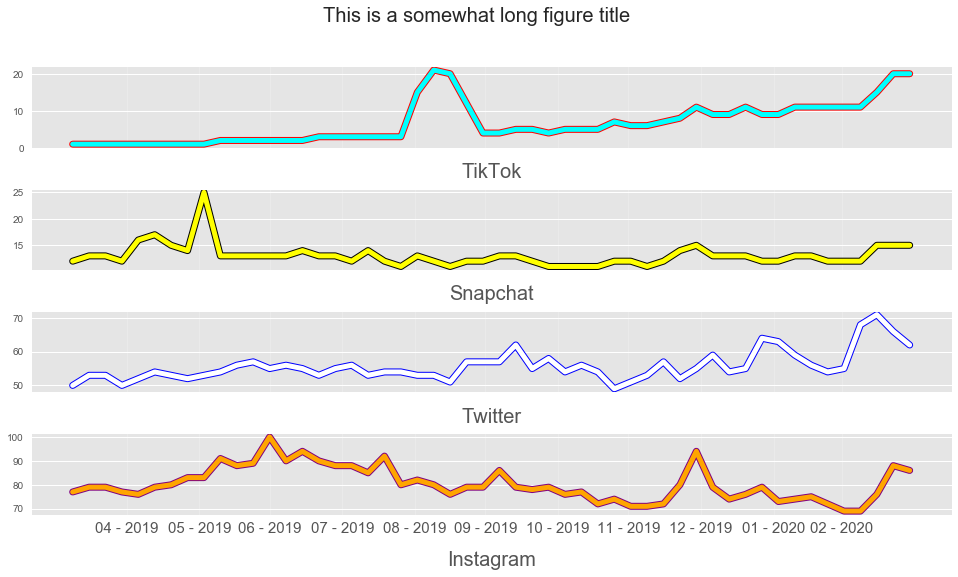

In [182]:
plt.style.use('ggplot')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1,figsize=(16.5,8.25), sharex=True)
ax1.plot(df.index, df['TikTok'], color='cyan', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='red'), pe.Normal()])
ax1.xaxis.grid(True,alpha=0.2)
ax1.set_xlabel('TikTok', fontsize=20, labelpad=15)

ax2.plot(df.index, df['Snapchat'], color='yellow', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='black'), pe.Normal()])
ax2.xaxis.grid(True,alpha=0.2)
ax2.set_xlabel('Snapchat', fontsize=20, labelpad=15)

ax3.plot(df.index, df['Twitter'], color='white', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='blue'), pe.Normal()])
ax3.xaxis.grid(True,alpha=0.2)
ax3.set_xlabel('Twitter', fontsize=20, labelpad=15)

ax4.plot(df.index, df['Instagram'], color='orange', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='purple'), pe.Normal()])
ax4.xaxis.grid(True,alpha=0.2)
ax4.set_xlabel('Instagram', fontsize=20, labelpad=15)

fig.suptitle('This is a somewhat long figure title', fontsize=20)
fig.subplots_adjust(hspace=.5)

xtick_dates = pd.date_range(start = df.index[0], end = df.index[-1], freq='1M')
plt.xticks(xtick_dates, [dtz.strftime('%m - %Y') for dtz in xtick_dates], fontsize=15)

plt.show()

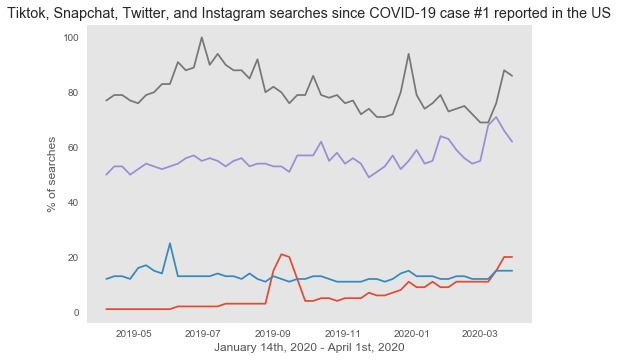

In [183]:
fig, ax = plt.subplots()
ax.plot(df)

ax.set(
    xlabel='January 14th, 2020 - April 1st, 2020', 
    ylabel='% of searches',
    title='Tiktok, Snapchat, Twitter, and Instagram searches since COVID-19 case #1 reported in the US')
ax.grid()